Tiandra Threat
# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

I define most profitable item by subtracting State Bottle Cost from State Bottle Retail (Revenue - Cost of Goods Sold (COGS) = Profit). Therefore, whichever bottle has the highest total profit would be the most profitable. Arguably, most profitable could be calculated by volume of sales as well. However, with a bit of research, I found that this approach is less common.

,bottles_sold,avg_profit_per_unit,total_profit
Item Description,,,
TITOS HANDMADE VODKA,"57,263",$5.97,"$364,074"
BLACK VELVET,"76,184",$3.43,"$274,677"
FIREBALL CINNAMON WHISKEY,"97,308",$3.75,"$187,535"
CROWN ROYAL,"19,817",$8.31,"$160,982"
CROWN ROYAL REGAL APPLE,"16,250",$7.88,"$122,880"
CAPTAIN MORGAN SPICED RUM,"20,822",$5.91,"$121,115"
HAWKEYE VODKA,"53,675",$2.36,"$116,375"
CAPTAIN MORGAN ORIGINAL SPICED,"22,750",$4.92,"$112,147"
JACK DANIELS OLD #7 BLACK LABEL,"12,592",$9.20,"$111,509"


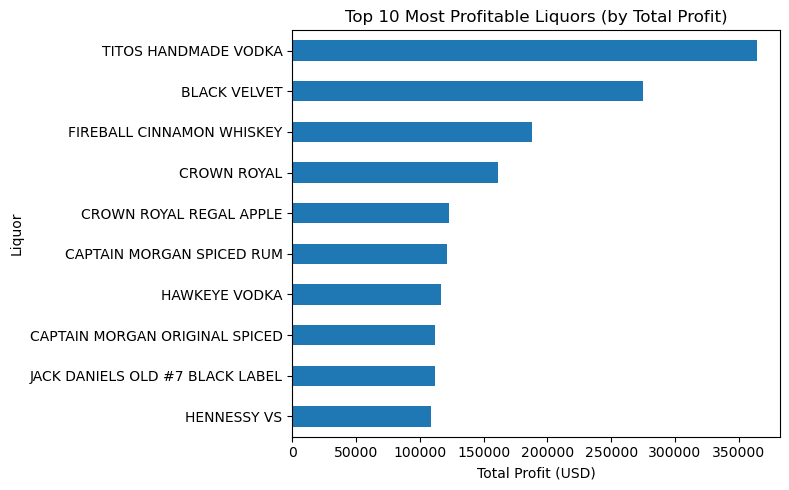

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("iowa.csv")

# CLean data
for col in ["State Bottle Retail", "State Bottle Cost", "Bottles Sold"]:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace("$", "", regex=False)
            .str.replace(",", "", regex=False)
        )
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Define profit metrics
df["profit_per_unit"] = df["State Bottle Retail"] - df["State Bottle Cost"]
df["total_profit"] = df["profit_per_unit"] * df["Bottles Sold"]


group_key = "Item Description" if "Item Description" in df.columns else "Item Number"

# Group and aggregate
grouped = (
    df.groupby(group_key, dropna=True)
      .agg(
          bottles_sold=("Bottles Sold", "sum"),
          avg_profit_per_unit=("profit_per_unit", "mean"),
          total_profit=("total_profit", "sum")
      )
      .sort_values("total_profit", ascending=False)
)

# Display top liquors by total profit
top_n = 10
top = grouped.head(top_n)
display(top.style.format({
    "bottles_sold": "{:,.0f}",
    "avg_profit_per_unit": "${:,.2f}",
    "total_profit": "${:,.0f}"
}))

# Visualization
plt.figure(figsize=(8, 5))
top["total_profit"].sort_values().plot(kind="barh")
plt.xlabel("Total Profit (USD)")
plt.ylabel("Liquor")
plt.title(f"Top {top_n} Most Profitable Liquors (by Total Profit)")
plt.tight_layout()
plt.show()


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
- Instead, try `x.reshape(-1,1)-y.reshape(-1,1)`. What do you get?
- Try `x.reshape(1,-1)-y.reshape(1,-1)`. Compare the results to your previous answer.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$

When I try to subtract the two vectors, I receive a ValueError: operands could not be broadcast together with shapes (3,) (2,). When I try x.reshape(-1,1)-y.reshape(-1,1), I get ValueError: operands could not be broadcast together with shapes (3,1) (2,1). When I try x.reshape(1,-1)-y.reshape(1,-1), I get ValueError: operands could not be broadcast together with shapes (1,3) (1,2). However, reshapin to a column and a row does work: x.reshape(-1,1) - y.reshape(1,-1) broadcasts to shape (len(x), len(y)), producing the full pairwise (outer) difference matrix where entry (i,j) equals x[i] - y[j].

In [18]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

x-y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [19]:

x.reshape(-1,1)-y.reshape(-1,1)

ValueError: operands could not be broadcast together with shapes (3,1) (2,1) 

In [20]:

x.reshape(1,-1)-y.reshape(1,-1)

ValueError: operands could not be broadcast together with shapes (1,3) (1,2) 

In [21]:
x.reshape(-1,1) - y.reshape(1,-1)

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [ ]:
# Column - Row
res1 = np.zeros((len(x), len(y)))
for i in range(len(x)):
    for j in range(len(y)):
        res1[i,j] = x[i] - y[j]

res1


array([[-1., -4.],
       [ 1., -2.],
       [ 3.,  0.]])

In [25]:
# Row - Column
res2 = np.zeros((len(y), len(x)))
for i in range(len(y)):
    for j in range(len(x)):
        res2[i,j] = y[i] - x[j]

res2

array([[ 1., -1., -3.],
       [ 4.,  2.,  0.]])

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ is false and 1 if $x \le z$ is true.

- For $y = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition that
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

## ECDF shows the proportion of observations <= z

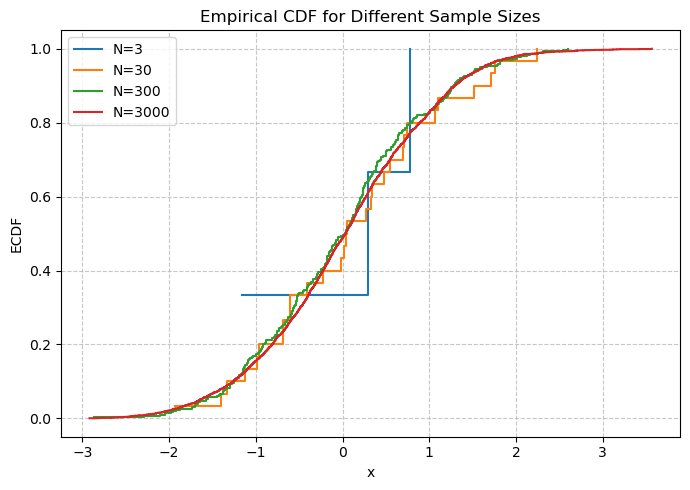

In [15]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)

def ecdf(sample):
    x = np.sort(sample)
    n = len(x)
    y = np.arange(1, n+1) / n
    return x, y

plt.figure(figsize=(7, 5))

for N in (3, 30, 300, 3000):
    X = rng.normal(0, 1, N)
    x, y = ecdf(X)

    plt.step(x, y, where="post", label=f"N={N}")

plt.xlabel("x")
plt.ylabel("ECDF")
plt.title("Empirical CDF for Different Sample Sizes")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Interpretation
Smaller samples (e.g., N=3) → the ECDF is jagged, with large step sizes and noticeable variability.  
Larger samples (e.g., N=3000) → the ECDF is much smoother and closely matches the true Normal(0,1) distribution.  

As the sample size increases, each observation contributes less weight (1/N), so the steps get smaller and the random fluctuations decrease.



4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

Q1/Median/Q3: 8.67 12.99 19.92
IQR + whiskers: (8.67, 19.92, 11.250000000000002, -8.205000000000004, 36.795)
Five-number summary: {'whisker_low': -8.205000000000004, 'whisker_high': 36.795, 'min_in': 0.0, 'q1': 8.67, 'median': 12.99, 'q3': 19.92, 'max_in': 36.75}
Outlier count: 9678 of 159904

Pandas describe():
count    159904.000000
mean         16.480350
std          17.099067
min           0.000000
25%           8.670000
50%          12.990000
75%          19.920000
max        3448.260000
Name: State Bottle Retail, dtype: float64


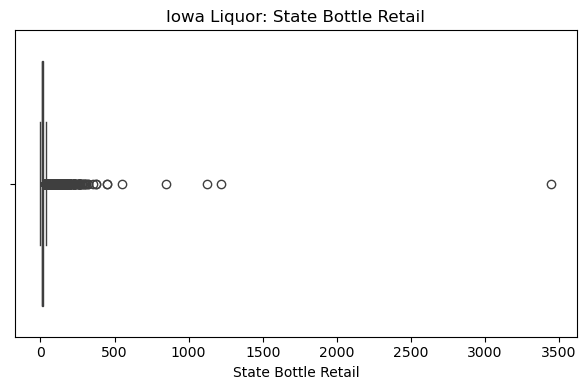

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("iowa.csv")

# functions
def q_no_np(x, q):
    a = np.asarray(x, float); a = a[~np.isnan(a)]
    if a.size == 0: return np.nan
    a.sort()
    if a.size == 1: return float(a[0])
    p = (a.size-1)*q; lo = int(np.floor(p)); hi = int(np.ceil(p)); f = p-lo
    return float((1-f)*a[lo] + f*a[hi])

def iqr_whisk(x, c=1.5):
    q1, q3 = q_no_np(x, .25), q_no_np(x, .75)
    iqr = q3 - q1
    return q1, q3, iqr, q1 - c*iqr, q3 + c*iqr

def five_num(x, c=1.5):
    a = np.asarray(x, float); a = a[~np.isnan(a)]
    if a.size == 0:
        return dict(whisker_low=np.nan, whisker_high=np.nan,
                    min_in=np.nan, q1=np.nan, median=np.nan, q3=np.nan, max_in=np.nan)
    q1, q3, iqr, wl, wh = iqr_whisk(a, c); med = q_no_np(a, .5)
    inb = a[(a >= wl) & (a <= wh)]
    if inb.size == 0: inb = a
    return dict(whisker_low=float(wl), whisker_high=float(wh),
                min_in=float(inb.min()), q1=float(q1), median=float(med),
                q3=float(q3), max_in=float(inb.max()))

def is_outlier(x, c=1.5):
    a = np.asarray(x, float); m = np.zeros_like(a, dtype=bool); ok = ~np.isnan(a)
    if ok.sum() == 0: return m
    _, _, _, wl, wh = iqr_whisk(a[ok], c)
    m[ok] = (a[ok] < wl) | (a[ok] > wh)
    return m


# five number summary and outlier
col = pd.to_numeric(df["State Bottle Retail"]
                    .astype(str)
                    .str.replace("$","",regex=False)
                    .str.replace(",","",regex=False),
                    errors="coerce")

print("Q1/Median/Q3:", q_no_np(col,.25), q_no_np(col,.5), q_no_np(col,.75))
print("IQR + whiskers:", iqr_whisk(col))
print("Five-number summary:", five_num(col))
print("Outlier count:", is_outlier(col).sum(), "of", col.notna().sum())

# comparisons
print("\nPandas describe():")
print(col.describe())

plt.figure(figsize=(6,4))
sns.boxplot(x=col, orient="h")
plt.title("Iowa Liquor: State Bottle Retail")
plt.tight_layout()
plt.show()


## Comparison observation
The functions produced the five-number summary, and an outlier for the State Bottle Retail column. The values matched closely with df.describe(), which confirmed that the quantile calculations were correct. The sns.boxplot visualized the same summary and highlighted extreme values such as 3448.26, while our function provided the full count of outliers (9678/159,904).

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?